In [1]:
'''
!pip install Cython
!git clone https://github.com/waleedka/coco.git

!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI
'''

'\n!pip install Cython\n!git clone https://github.com/waleedka/coco.git\n\n!pip install -U setuptools\n!pip install -U wheel\n!make install -C coco/PythonAPI\n'

In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Ignore Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
print(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/interior/"))  # To find local version
import interior

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
print('finished')

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorf

/home/erbachj/MaskRCNN/Mask_RCNN


Using TensorFlow backend.


finished


In [3]:
class TrainConfig(interior.InteriorNetConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 30

config = TrainConfig()
config.display()
batch_size = config.BATCH_SIZE


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                53
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [4]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)
#model.load_weights(model_path, by_name=True)

# Load pretrained weights
model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [5]:
#TRAIN_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/3FO4IDDWIQX7_Dining_room'
#TRAIN_DIR = os.path.join(TRAIN_DIR,'cam0/data/')
TRAIN_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7'
# Training dataset
dataset_train = interior.InteriorDataset()
dataset_train.load_Interior(dataset_dir=TRAIN_DIR, subset='train')
dataset_train.prepare()

# Validation dataset
#VAL_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/3FO4IDEI1LAV_Dining_room'
#VAL_DIR = os.path.join(VAL_DIR,'cam0/data/')
VAL_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7'

dataset_val = interior.InteriorDataset()
dataset_val.load_Interior(dataset_dir=VAL_DIR, subset='val')
dataset_val.prepare()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotation

Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
cre

/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/train/3FO4MM1V06TL_Living_room/./cam0/data/4.png
[  8  10  13  25  27  39  41  44  46  48  58  61  70  81  83 106 108 109
 110 111 112 113 116 117 119 120 121 123 124 136 137 138 139 140 272 277
 278 279 283 316 317 319 337 338 345 348]
8
(480, 640)
[5]
10
(480, 640)
[0]
13
(480, 640)
[7]
25
(480, 640)
[35]
27
(480, 640)
[40]
39
(480, 640)
[7]
41
(480, 640)
[40]
44
(480, 640)
[40]
46
(480, 640)
[0]
48
(480, 640)
[2]
58
(480, 640)
[2]
61
(480, 640)
[2]
70
(480, 640)
[22]
81
(480, 640)
[40]
83
(480, 640)
[40]
106
(480, 640)
[40]
108
(480, 640)
[40]
109
(480, 640)
[40]
110
(480, 640)
[40]
111
(480, 640)
[40]
112
(480, 640)
[40]
113
(480, 640)
[40]
116
(480, 640)
[40]
117
(480, 640)
[40]
119
(480, 640)
[40]
120
(480, 640)
[40]
121
(480, 640)
[40]
123
(480, 640)
[40]
124
(480, 640)
[40]
136
(480, 640)
[40]
137
(480, 640)
[40]
138
(480, 640)
[40]
139
(480, 640)
[40]
140
(480, 640)
[40]
272
(480, 640)
[0]
277
(480, 640)
[0]
278
(480, 

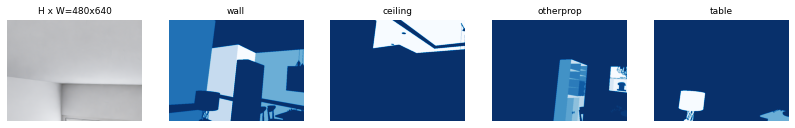

In [8]:
image_id = 4
image = dataset_train.load_image(image_id)
plt.imshow(image)
path = dataset_train.image_info[image_id]['path']
print(path)

mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)


In [7]:
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    print(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

1333
[   26    84   146 65535]
26
(480, 640)
[9]
84
(480, 640)
[40]
146
(480, 640)
[ 1 22]
65535
(480, 640)
[0]


ValueError: setting an array element with a sequence.

In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
categories = [{"id":1,"name":"wall","supercategory":"null"},{"id":2,"name":"floor","supercategory":"null"},{"id":3,"name":"cabinet","supercategory":"null"},{"id":4,"name":"bed","supercategory":"null"},{"id":5,"name":"chair","supercategory":"null"},{"id":6,"name":"sofa","supercategory":"null"},{"id":7,"name":"table","supercategory":"null"},{"id":8,"name":"door","supercategory":"null"},{"id":9,"name":"window","supercategory":"null"},{"id":10,"name":"bookshelf","supercategory":"null"},{"id":11,"name":"picture","supercategory":"null"},{"id":12,"name":"counter","supercategory":"null"},{"id":13,"name":"blinds","supercategory":"null"},{"id":14,"name":"desk","supercategory":"null"},{"id":15,"name":"shelves","supercategory":"null"},{"id":16,"name":"curtain","supercategory":"null"},{"id":17,"name":"dresser","supercategory":"null"},{"id":18,"name":"pillow","supercategory":"null"},{"id":19,"name":"mirror","supercategory":"null"},{"id":20,"name":"floor","supercategory":"null"},{"id":21,"name":"clothes","supercategory":"null"},{"id":22,"name":"ceiling","supercategory":"null"},{"id":23,"name":"books","supercategory":"null"},{"id":24,"name":"refridgerator","supercategory":"null"},{"id":25,"name":"television","supercategory":"null"},{"id":26,"name":"paper","supercategory":"null"},{"id":27,"name":"towel","supercategory":"null"},{"id":28,"name":"shower","supercategory":"null"},{"id":29,"name":"box","supercategory":"null"},{"id":30,"name":"whiteboard","supercategory":"null"},{"id":31,"name":"person","supercategory":"null"},{"id":32,"name":"night","supercategory":"null"},{"id":33,"name":"toilet","supercategory":"null"},{"id":34,"name":"sink","supercategory":"null"},{"id":35,"name":"lamp","supercategory":"null"},{"id":36,"name":"bathtub","supercategory":"null"},{"id":37,"name":"bag","supercategory":"null"},{"id":38,"name":"otherstructure","supercategory":"null"},{"id":39,"name":"otherfurniture","supercategory":"null"}, {"id":40,"name":"otherprop","supercategory":"null"}]
class_names = []
for category in categories:
    class_names.append(category['name'])

class_names = ['BG','wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa',
               'table', 'door', 'window', 'bookshelf', 'picture', 'counter',
               'blinds', 'desk', 'shelves', 'curtain', 'dresser', 'pillow', 
               'mirror', 'floor', 'clothes', 'ceiling', 'books', 'refridgerator',
               'television', 'paper', 'towel', 'shower', 'box', 'whiteboard', 
               'person', 'night', 'toilet', 'sink', 'lamp', 'bathtub', 'bag', 
               'otherstructure', 'otherfurniture', 'otherprop']

print(class_names)
len(class_names)

In [ ]:
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
'''
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess= tf.Session(config=config):
'''

# Training - Stage 1
print("Training network heads")
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=40,
            layers='heads')



In [ ]:
# Training - Stage 2
# Finetune layers from ResNet stage 4 and up
print("Fine tune Resnet stage 4 and up")
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=120,
            layers='4+')



In [ ]:
# Training - Stage 3
# Fine tune all layers
print("Fine tune all layers")
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=160,
            layers='all')

In [ ]:
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_interior.h5")
model.keras_model.save_weights(model_path)

In [ ]:
class InferenceConfig(interior.InteriorNetConfig):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1
            DETECTION_MIN_CONFIDENCE = 0
config = InferenceConfig()
config.display()

with tf.device("/gpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)

model_path = model.find_last()
print(model_path)
# Load weights trained on MS-COCO
model.load_weights(model_path, by_name=True)

In [ ]:
path = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/test/3FO4MLNLVIOK_Bedroom/cam0/data/8.png'
SAVE_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/Results/'
name = '0'
print(path)
im = cv2.imread(path)
results = model.detect([im])
# Visualize results
r = results[0]
visualize.display_instances(im, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
visualize.save_image(image_name = name, image = im, boxes = r['rois'], masks = r['masks'], class_ids = r['class_ids'], class_names = class_names, scores = r['scores'], save_dir = SAVE_DIR)
